names, ids

# Title: 

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def remove_outliers_z(data,variable):
    
    #https://www.kite.com/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python
    data['z_scores'] = np.abs(stats.zscore(data[variable]))
    data = data.loc[data['z_scores'] < 3,:]
    data = data.drop('z_scores',axis = 1)
    
    return data

# DATA

In [73]:
url = 'https://raw.githubusercontent.com/EmeryK-1/DataMadness/main/heart.csv'
df = pd.read_csv(url)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**No missing values.**

In [6]:
#df['RestingBP'].unique()

**RestingBP contains 0, 0 is not a possible value. We remove instance where RestingBP = 0.**

In [7]:
df = df.loc[df['RestingBP'] !=0, :]
#df['RestingBP'].unique()

In [8]:
#df['Cholesterol'].unique()

In [9]:
df = df.loc[df['Cholesterol'] !=0, :]
#df['Cholesterol'].unique()

**Cholesterol contains 0, 0 is not a possible value. We remove instance where Cholesterol = 0.**

In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
df.groupby('HeartDisease').mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.171795,130.164103,238.769231,0.110256,149.058974,0.393846
1,55.851124,136.154494,251.061798,0.230337,130.550562,1.457865


## CATEGORICAL FEATURES

In [12]:
cat_cols = df.select_dtypes(include=['object'])

In [13]:
cat_col_names = cat_cols.columns.values

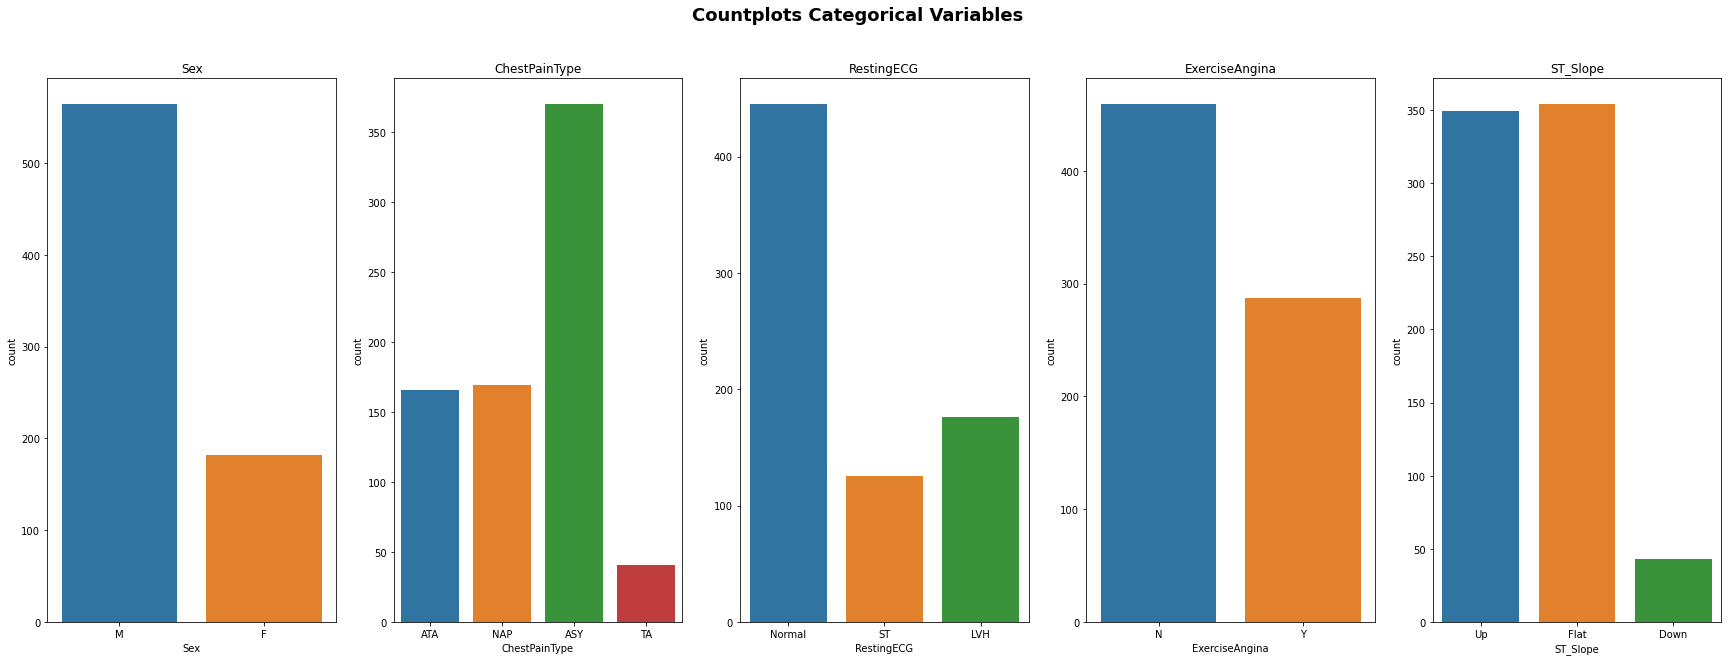

In [14]:
# https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
fig, axes = plt.subplots(1, 5, figsize=(30, 10))
fig.suptitle('Countplots Categorical Variables',fontsize=18, fontweight='bold')

for i in range(len(cat_col_names)):
    sns.countplot(ax=axes[i], x=cat_col_names[i], data=cat_cols)
    axes[i].set_title(cat_col_names[i])


In [15]:
for col_name in cat_col_names:
    print(df[col_name].value_counts())
    print("")

M    564
F    182
Name: Sex, dtype: int64

ASY    370
NAP    169
ATA    166
TA      41
Name: ChestPainType, dtype: int64

Normal    445
LVH       176
ST        125
Name: RestingECG, dtype: int64

N    459
Y    287
Name: ExerciseAngina, dtype: int64

Flat    354
Up      349
Down     43
Name: ST_Slope, dtype: int64



### Imbalanced Categorical Data

Question: Which of these imbalances are worrisome?

- Sex: extremely imbalanced (less F)
- FastingBS: extremly imbalanced (less 1)


- ChestPainType: imbalanced, TA extremely under represented
- ST_Slope: imbalanced, Down extremely under represented
- RestingECG: somewhat imbalnaced, # Normal ~ # LVH + ST


- ExerciseAngina: balanced

In [16]:
#Sex
count_M = df.loc[df['Sex']=='M','Sex'].count()
count_F = df.loc[df['Sex']=='F','Sex'].count()

perc_M = count_M/(count_M + count_F)
perc_M

0.7560321715817694

In [17]:
#ChestPainType
count_ASY = df.loc[df['ChestPainType']=='ASY','ChestPainType'].count()
count_NAP = df.loc[df['ChestPainType']=='NAP','ChestPainType'].count()
count_ATA = df.loc[df['ChestPainType']=='ATA','ChestPainType'].count()
count_TA = df.loc[df['ChestPainType']=='TA','ChestPainType'].count()

total_count_ChestPainType = count_ASY + count_NAP + count_ATA + count_TA

perc_TA  = count_TA/total_count_ChestPainType 
perc_TA 

0.054959785522788206

In [18]:
cat_cols.groupby('Sex').count()

,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
Sex,,,,
F,182,182,182,182
M,564,564,564,564


## CONTINUOUS FEATURES

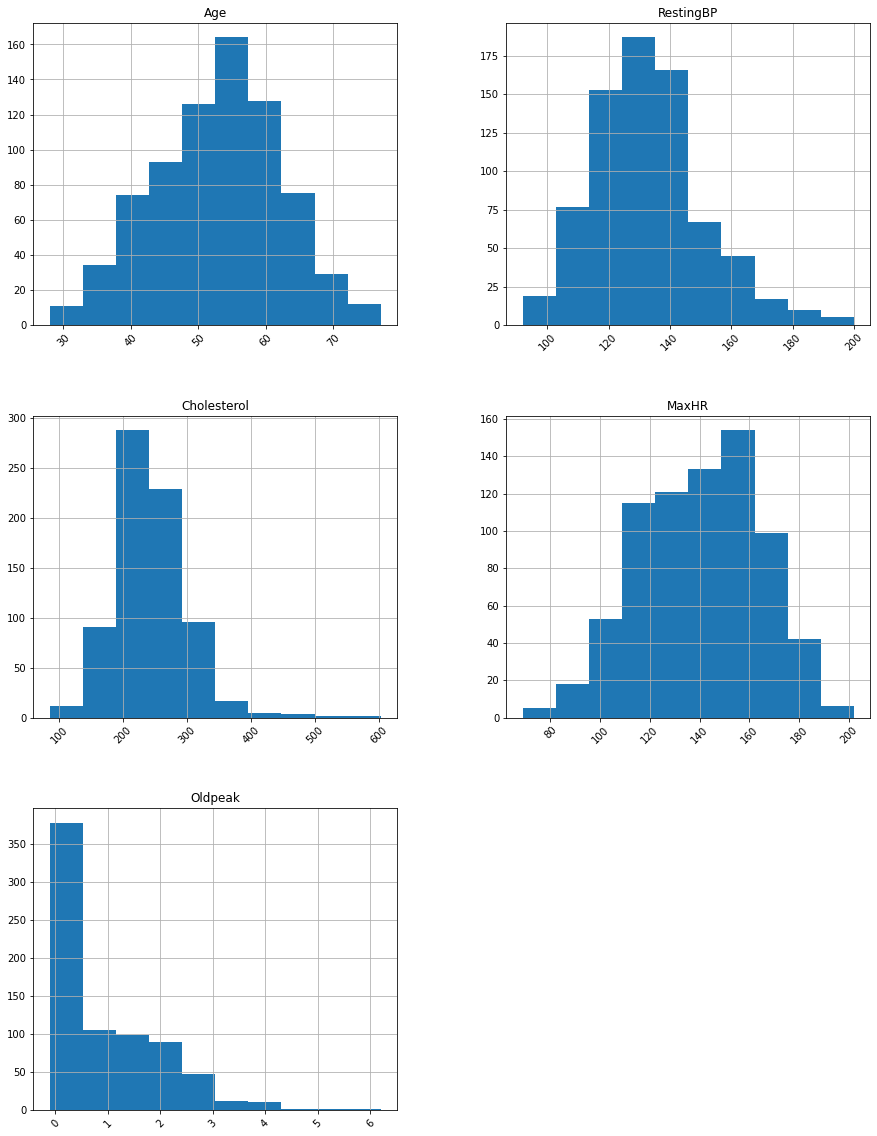

In [19]:
#Histograms Continuous Features
num_cols = df.drop(columns =['HeartDisease', 'FastingBS']).select_dtypes(include=['int64', 'float64'])
num_cols.hist(figsize=(15,20), xrot=45)
plt.show()

In [20]:
num_col_names = num_cols.columns.values
num_col_names

array(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'],
      dtype=object)

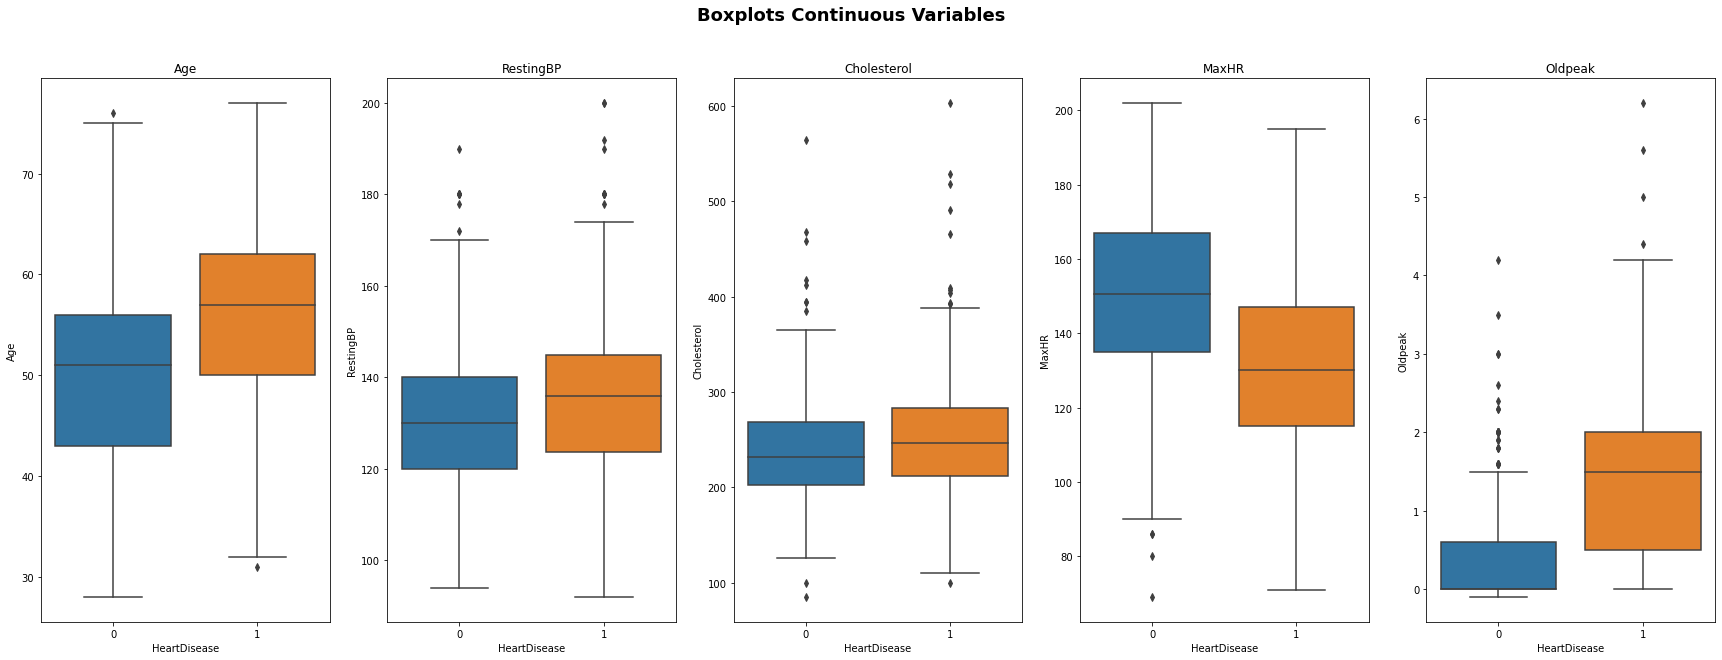

In [21]:
# https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
fig, axes = plt.subplots(1, 5, figsize=(30, 10))
fig.suptitle('Boxplots Continuous Variables',fontsize=18, fontweight='bold')

for i in range(len(num_col_names)):
    sns.boxplot(ax=axes[i], x=df['HeartDisease'], y = num_cols[num_col_names[i]])
    axes[i].set_title(num_col_names[i])

- **Difference in population means?: Age, MaxHR**

- **Outliers: Cholesterol, RestingBP**

- **Are outliers important in this case? Train model with and without outliers?**

# QUESTIONS

*Overarching Question: How can we characterise the group most vulnerable to cardiovascular disease to prevent heart failure?*

## Q1

**#1 Which combination of predictors is most dangerous? (e.g.,cholesterol and age)**

*Men*
- which prediction pair predicts Heart Disease = 1 best for Men? (TP rate, AUROC scores)
- what is the threshold of those 2 predictors for Men?

*Women*
- which prediction pair predicts Heart Disease = 1 best for Women? (TP rate, AUROC scores)
- what is the threshold of those 2 predictors for Women?

Algorithm: Decision Trees, Random Forest

### OHE

In [74]:
# Binary Categorical Variables

# Classification2a notebook
def sex_to_numeric(x):
    if x=='M':
        return 0
    if x=='F':
        return 1
    else:
        return x
df['Sex'] = df['Sex'].apply(sex_to_numeric)

In [75]:
def ExerciseAngina_to_numeric(x):
    if x=='N':
        return 0
    if x=='Y':
        return 1
    else:
        return x
df['ExerciseAngina'] = df['ExerciseAngina'].apply(ExerciseAngina_to_numeric)

In [76]:
# Categorical Variables with more than 2 categories
df = pd.get_dummies(df, columns=['ChestPainType'], prefix = ['CPT'])
df = pd.get_dummies(df, columns=['RestingECG'], prefix = ['RE'])
df = pd.get_dummies(df, columns=['ST_Slope'], prefix = ['ST'])

In [77]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,CPT_ASY,CPT_ATA,CPT_NAP,CPT_TA,RE_LVH,RE_Normal,RE_ST,ST_Down,ST_Flat,ST_Up
0,40,0,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,1,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,1,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,0,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,68,0,144,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,57,0,130,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,57,1,130,236,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


**#1 Which combination of predictors is most dangerous? (e.g.,cholesterol and age)**

I did not yet separate men and women

In [78]:
# Classification 2a notebook

def splitData(features):
    """Split a subset of the Heart Disease dataset, given by the features, into train and test sets."""
    HeartDisease_predictors = df[features].values
    HeartDisease_labels = df["HeartDisease"].values

    # Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(HeartDisease_predictors, HeartDisease_labels, random_state=1, test_size=0.5)
    return XTrain, XTest, yTrain, yTest

In [79]:
# Classification 2a notebook

from IPython.display import Image, display  
import pydotplus 
from scipy import misc

def renderTree(my_tree, features):
    # hacky solution of writing to files and reading again
    # necessary due to library bugs
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree, 
                                 out_file=f, 
                                 feature_names=features, 
                                 class_names=["HeartDisease", "Healthy"],  
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True)
  
    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()

    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "temp.png"
    graph.write_png(image_name)  
    display(Image(filename=image_name))

Accuracy on training data =  0.9760348583877996
Accuracy on test data =  0.616557734204793


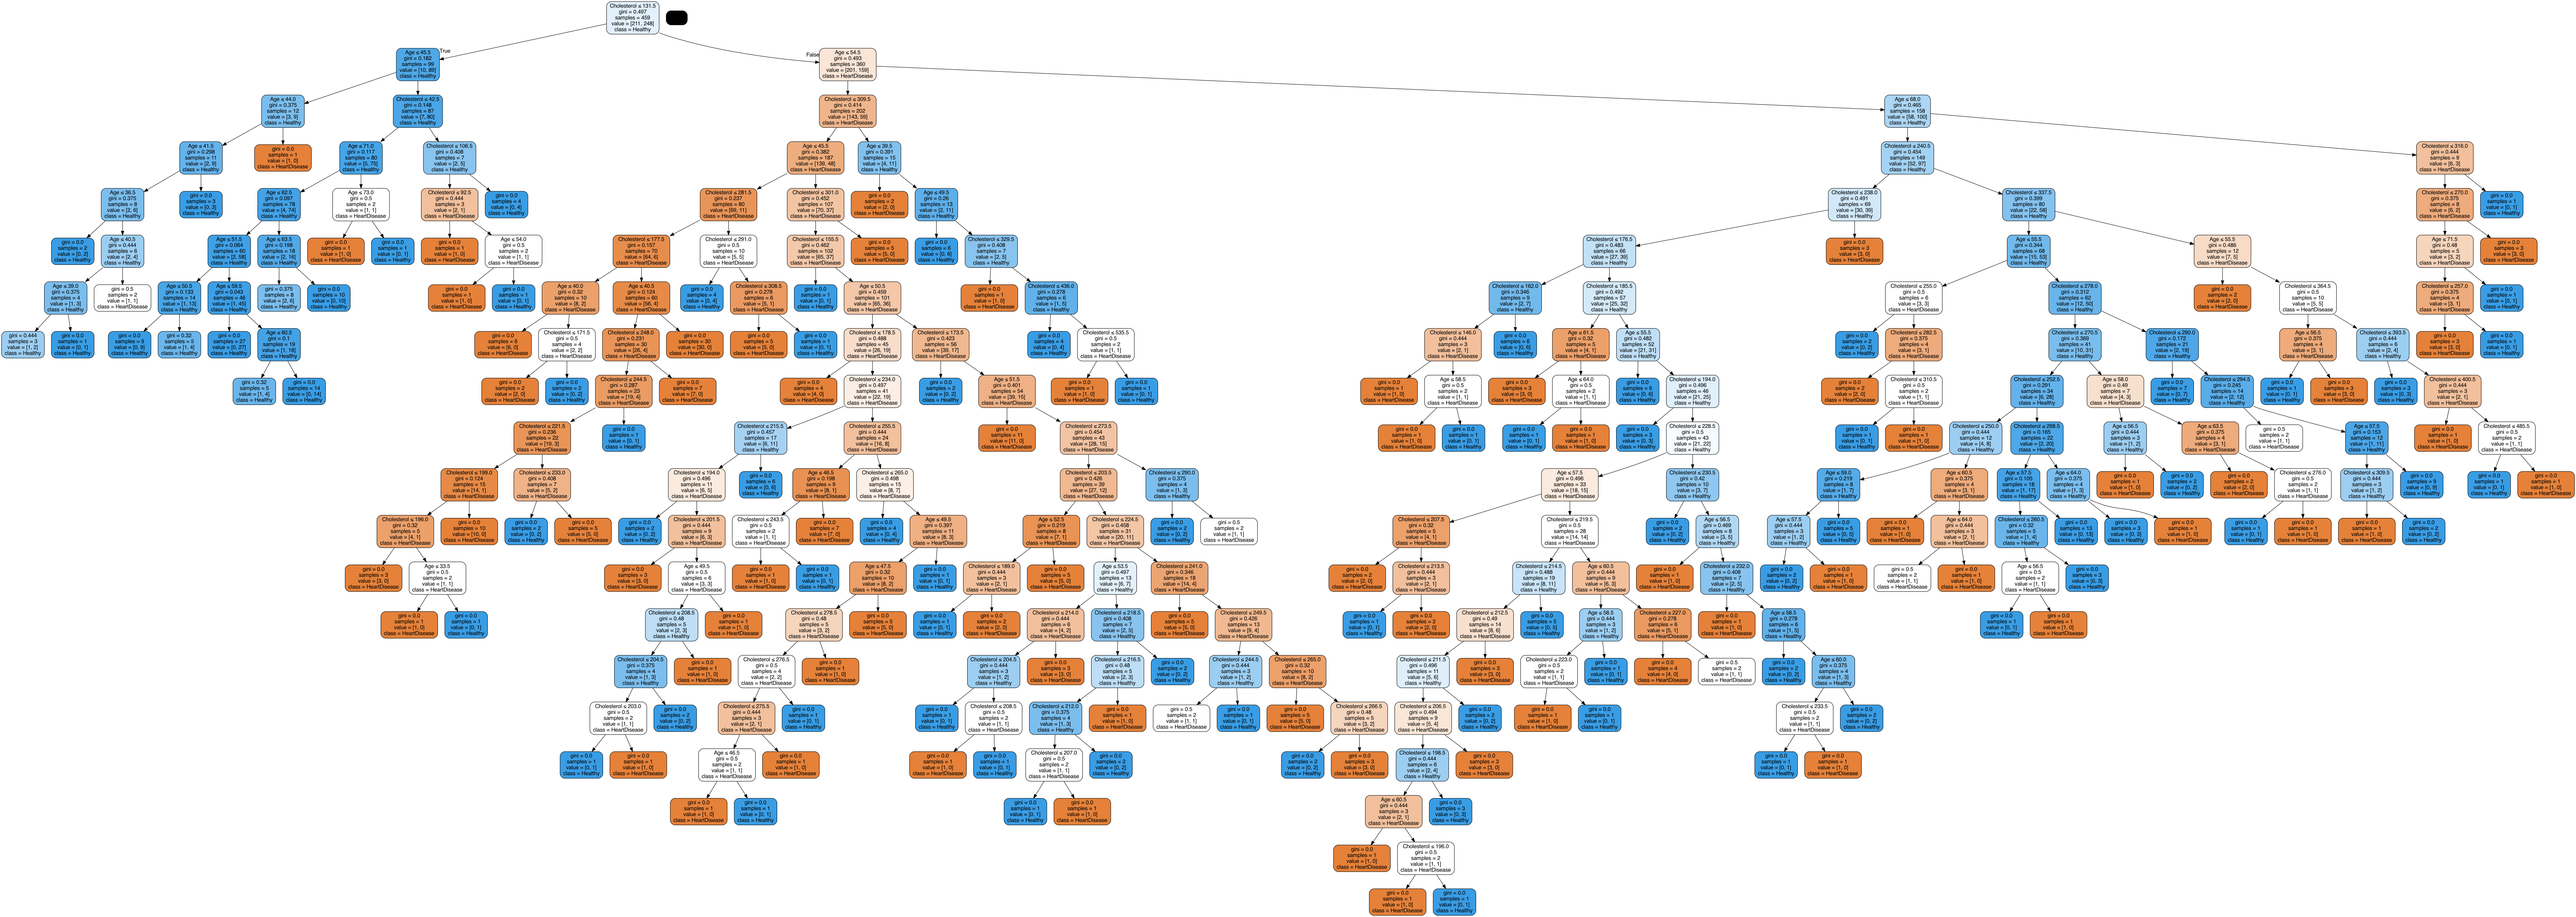

In [85]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

decisionTree = tree.DecisionTreeClassifier()

used_features = ['Age','Cholesterol']
XTrain, XTest, yTrain, yTest = splitData(used_features)
# fit the tree with the traing data
decisionTree = decisionTree.fit(XTrain, yTrain)

# predict with the training data
y_pred_train = decisionTree.predict(XTrain)
# measure accuracy
print('Accuracy on training data = ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

# predict with the test data
y_pred = decisionTree.predict(XTest)
# measure accuracy
print('Accuracy on test data = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

renderTree(decisionTree, used_features)